<a href="https://colab.research.google.com/github/DeepaGali/DP_FinalProject/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update #update linux
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #download and install openjdk
!wget -q http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz #download spark binary (gunzip). -q: Turn off Wget’s output.
!tar xf spark-3.2.1-bin-hadoop2.7.tgz #extract the spark package
!pip install -q findspark #install the findspark package

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,512 kB]
Hit:13

In [ ]:
#set environment variables
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
!ls #check directory

sample_data  spark-3.2.1-bin-hadoop2.7	spark-3.2.1-bin-hadoop2.7.tgz


In [ ]:
!ls sample_data #check directory under sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
#1.	Import the data using inferred schema. Log the time taken to import.

#import pyspark

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 

# File location and type
path = 'sample_data/covid_19_202001_202007.csv'
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

#Log the time taken to import
import time
log_time = time.time()
# Import csv. The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(path)

print(df.head()) #first row object
#spark.time(df.show())
print(f"Time taken to Import csv: {time.time() - log_time}")

Row(Province/State=None, Country/Region='Afghanistan', Lat=33.93911, Long=67.709953, Date='2020-01-22', Confirmed=0, Deaths=0, Recovered=0, Active=0, WHO Region='Eastern Mediterranean')
Time taken to Import csv: 9.127525091171265


In [ ]:
df.show(10)

+--------------------+-------------------+--------+---------+----------+---------+------+---------+------+--------------------+
|      Province/State|     Country/Region|     Lat|     Long|      Date|Confirmed|Deaths|Recovered|Active|          WHO Region|
+--------------------+-------------------+--------+---------+----------+---------+------+---------+------+--------------------+
|                null|        Afghanistan|33.93911|67.709953|2020-01-22|        0|     0|        0|     0|Eastern Mediterra...|
|                null|            Albania| 41.1533|  20.1683|2020-01-22|        0|     0|        0|     0|              Europe|
|                null|            Algeria| 28.0339|   1.6596|2020-01-22|        0|     0|        0|     0|              Africa|
|                null|            Andorra| 42.5063|   1.5218|2020-01-22|        0|     0|        0|     0|              Europe|
|                null|             Angola|-11.2027|  17.8739|2020-01-22|        0|     0|        0|     

In [ ]:
df.describe()

DataFrame[summary: string, Province/State: string, Country/Region: string, Lat: string, Long: string, Date: string, Confirmed: string, Deaths: string, Recovered: string, Active: string, WHO Region: string]

In [ ]:
#2.	Define the schema and then import the data using your defined schema. Log the time taken to import
from pyspark.sql.types import *
path = 'sample_data/covid_19_202001_202007.csv'
#Log the time taken to import
import time
log_time1 = time.time()
# Define the schema
my_schema = StructType([
  # Define a StructField for each field
  StructField('Province/State', StringType(), False),
  StructField('Country/Region', StringType(), False),
  StructField('Lat', IntegerType(), False),
  StructField('Long', IntegerType(), False),
  StructField('Date', DateType(), False),
  StructField('Confirmed', IntegerType(), False),
  StructField('Deaths', IntegerType(), False),
  StructField('Recovered', IntegerType(), False),
  StructField('Active', IntegerType(), False),
  StructField('WHO Region', StringType(), False)
])

df1 = spark.read.csv(path, header=True, nullValue='NA', schema=my_schema )
print(df1.head())
print(f"Time taken to Import csv: {time.time() - log_time1}")

Row(Province/State=None, Country/Region='Afghanistan', Lat=None, Long=None, Date=datetime.date(2020, 1, 22), Confirmed=0, Deaths=0, Recovered=0, Active=0, WHO Region='Eastern Mediterranean')
Time taken to Import csv: 0.22438645362854004


In [ ]:
df1.describe()

DataFrame[summary: string, Province/State: string, Country/Region: string, Lat: string, Long: string, Confirmed: string, Deaths: string, Recovered: string, Active: string, WHO Region: string]

In [ ]:
df1.show(10)

+--------------------+-------------------+----+----+----------+---------+------+---------+------+--------------------+
|      Province/State|     Country/Region| Lat|Long|      Date|Confirmed|Deaths|Recovered|Active|          WHO Region|
+--------------------+-------------------+----+----+----------+---------+------+---------+------+--------------------+
|                null|        Afghanistan|null|null|2020-01-22|        0|     0|        0|     0|Eastern Mediterra...|
|                null|            Albania|null|null|2020-01-22|        0|     0|        0|     0|              Europe|
|                null|            Algeria|null|null|2020-01-22|        0|     0|        0|     0|              Africa|
|                null|            Andorra|null|null|2020-01-22|        0|     0|        0|     0|              Europe|
|                null|             Angola|null|null|2020-01-22|        0|     0|        0|     0|              Africa|
|                null|Antigua and Barbuda|null|n

In [ ]:
#3.	Would you recommend creating a schema first before importing the data? Why?
I would recommend creating a schema first before importing the data because, creating schema took 0.05 seconds and using inferred schema took 9 seconds.

So, it is clear that creating schema is faster than inferring a schema

In [ ]:
#4.	Provide summary statistics on the dataset
df.describe().show()

+-------+--------------+--------------+------------------+------------------+----------+------------------+-----------------+-----------------+-----------------+---------------+
|summary|Province/State|Country/Region|               Lat|              Long|      Date|         Confirmed|           Deaths|        Recovered|           Active|     WHO Region|
+-------+--------------+--------------+------------------+------------------+----------+------------------+-----------------+-----------------+-----------------+---------------+
|  count|         14664|         49068|             49068|             49068|     49068|             49068|            49068|            49068|            49068|          49068|
|   mean|          null|          null|21.433730459769688|23.528236452106245|      null| 16884.90425531915|884.1791595337083|7915.713479253282| 8085.01161653216|           null|
| stddev|          null|          null| 24.95031982606509|  70.4427397445028|      null|127300.20527228026|631

In [ ]:
#5.	For top 10 countries suffering from covid-19, plot the line charts to show the deaths from Jan 22, 2020 to July 27, 2020
df.createOrReplaceTempView("coviddeaths")
df_sql_query = spark.sql("SELECT `Country/Region`, SUM(Deaths) FROM coviddeaths WHERE Date between '2020-01-22' and '2020-07-27'  GROUP BY `Country/Region` ORDER BY sum(Deaths) DESC LIMIT 10") ;
df_sql_query.show()

+--------------+-----------+
|Country/Region|sum(Deaths)|
+--------------+-----------+
|            US|   11011411|
|United Kingdom|    3997775|
|        Brazil|    3938034|
|         Italy|    3707717|
|        France|    3048524|
|         Spain|    3033030|
|        Mexico|    1728277|
|         India|    1111831|
|          Iran|    1024136|
|       Belgium|     963679|
+--------------+-----------+



<Figure size 1296x720 with 0 Axes>

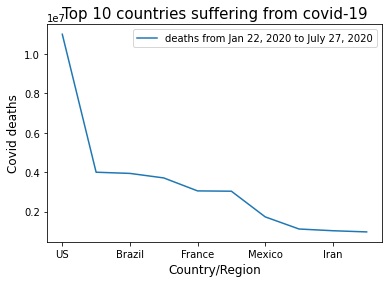

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
dataframeplt= df_sql_query.toPandas()
fig = plt.figure(figsize = (18,10))
dataframeplt.plot(x = 'Country/Region', y = 'sum(Deaths)', label = 'deaths from Jan 22, 2020 to July 27, 2020')
plt.title('Top 10 countries suffering from covid-19', fontsize = 15)
plt.xlabel('Country/Region', fontsize = 12)
plt.ylabel('Covid deaths', fontsize = 12)
plt.show()

In [ ]:
#6.	Plot the recovery rate (recovered cases / confirmed cases) for the period Jan 22, 2020 to July 27, 2020. Which 5 countries have a relatively higher recovery rate?
df.createOrReplaceTempView("recoveryrate")
df_sql_query1 = spark.sql("SELECT `Country/Region`, SUM(Recovered)/SUM(Confirmed) as recoveryrate FROM recoveryrate WHERE Date between '2020-01-22' and '2020-07-27'  GROUP BY `Country/Region` ORDER BY '(sum(Recovered) / sum(Confirmed))' Desc LIMIT 5") 
df_sql_query1.show()

+--------------+-------------------+
|Country/Region|       recoveryrate|
+--------------+-------------------+
|          Chad| 0.7482795129698253|
|      Paraguay| 0.4847384139205617|
|        Russia| 0.5532113422775353|
|         Yemen|0.35395951175945223|
|       Senegal| 0.6134853045306841|
+--------------+-------------------+



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<Figure size 1296x720 with 0 Axes>

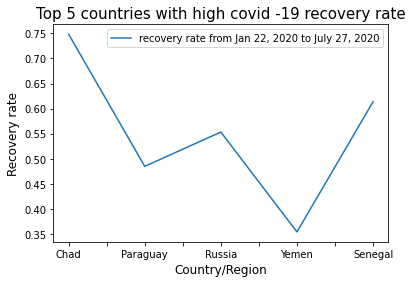

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
dataframeplt1= df_sql_query1.toPandas()
fig = plt.figure(figsize = (18,10))
dataframeplt1.plot(x = 'Country/Region', y = 'recoveryrate', label = 'recovery rate from Jan 22, 2020 to July 27, 2020')
plt.title('Top 5 countries with high covid -19 recovery rate', fontsize = 15)
plt.xlabel('Country/Region', fontsize = 12)
plt.ylabel('Recovery rate', fontsize = 12)
plt.show()

In [ ]:
#7.	As of July 27, 2020, aggregate the confirmed cases, deaths, recovered cases and active cases group by WHO region
df.createOrReplaceTempView("aggregate")
df_sql_query2 = spark.sql("SELECT `WHO Region`, SUM(Confirmed) as confirmed, SUM(Deaths) as deaths, SUM(Active) as active, SUM(Recovered) as recovered FROM aggregate WHERE Date <= '2020-07-27' GROUP BY `WHO Region` ") 
df_sql_query2.show()

+--------------------+---------+--------+---------+---------+
|          WHO Region|confirmed|  deaths|   active|recovered|
+--------------------+---------+--------+---------+---------+
|              Europe|248879793|19271040|106406678|123202075|
|     Western Pacific| 26374411|  932430|  6580031| 18861950|
|              Africa| 21791827|  439978| 10158119| 11193730|
|Eastern Mediterra...| 74082892| 1924029| 24108160| 48050703|
|            Americas|402261194|19359292|225832458|157069444|
|     South-East Asia| 55118365| 1458134| 23629904| 30030327|
+--------------------+---------+--------+---------+---------+



In [ ]:
#8.	Which 5 countries have the highest growth rate on confirmed cases 3 months after the 1st positive case detected within the country?
df.createOrReplaceTempView("growthrate")
firstConfirmedDate = spark.sql("SELECT min(Date) as firstConfirmedDate FROM growthrate") 
firstConfirmedDate.show()

+------------------+
|firstConfirmedDate|
+------------------+
|        2020-01-22|
+------------------+



In [ ]:
df.createOrReplaceTempView("growthrate1")
df_sql_query5 = spark.sql("SELECT `Country/Region`, SUM(active)/SUM(Confirmed) as growthrate FROM growthrate1 WHERE Date <= '2020-03-22' GROUP BY `Country/Region` ORDER BY '(sum(active) / sum(Confirmed))' Desc LIMIT 5")
df_sql_query5.show()

+--------------+------------------+
|Country/Region|        growthrate|
+--------------+------------------+
|          Chad|               1.0|
|      Paraguay| 0.983739837398374|
|        Russia| 0.914409534127844|
|         Yemen|              null|
|       Senegal|0.9193083573487032|
+--------------+------------------+



In [ ]:
#9.	For step 7, export the results to a JSON file
df_sql_query2.write.json("covid19aggregation.json")
